In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
# from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


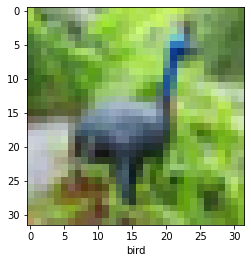

In [ ]:
IMG_INDEX = 6  # change this to look at other images
 
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5068 - accuracy: 0.4520 - val_loss: 1.2969 - val_accuracy: 0.5368
Epoch 2/4
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1259 - accuracy: 0.6014 - val_loss: 1.0527 - val_accuracy: 0.6317
Epoch 3/4
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9799 - accuracy: 0.6563 - val_loss: 0.9536 - val_accuracy: 0.6668
Epoch 4/4
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8795 - accuracy: 0.6897 - val_loss: 0.9203 - val_accuracy: 0.6842


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 0.9203 - accuracy: 0.6842


In [ ]:
print(test_acc)

0.6841999888420105


In [ ]:
def predict(model, image, correct_label):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


In [ ]:
print(test_images)

In [ ]:
print(test_labels[0])

[3]


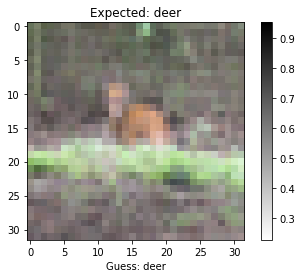

In [ ]:
num = 32

image = test_images[num]
label = test_labels[num][0]

# predict(model, image, label)

prediction = model.predict(np.array([image]))
guess = class_names[np.argmax(prediction)]
actual_value = class_names[label]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title("Expected: " + actual_value)
plt.xlabel("Guess: " + guess)
plt.colorbar()
plt.grid(False)
plt.show()
